In [1]:
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
import numpy as np
from impedance.visualization import plot_nyquist
import matplotlib.pyplot as plt

In [2]:
@element(num_params=2, units=["Ohm", "F"],overwrite=True)
def TLMuniNew(p, f):
   
    omega = 2 * np.pi * np.array(f)
    R1, Q = p[0], p[1]
    Z= 2*np.sqrt(R1/(omega*1j*Q))*(1/(np.tanh(np.sqrt(1j*omega*R1*Q))))
    return Z

In [3]:
tlmuni=CustomCircuit(initial_guess=[2000,1e-3],circuit='TLMuniNew_0')
tlmuni2=CustomCircuit(initial_guess=[1000,1e-4],circuit='TLMuniNew_0')

In [4]:
err_noise=0
f_pred = np.logspace(3,-3,num=100)
tlmuni_pred = tlmuni.predict(f_pred)
tlmuni_pred+=np.random.normal(np.real(tlmuni_pred),np.abs(err_noise*np.real(tlmuni_pred)))+1j*np.random.normal(np.imag(tlmuni_pred),np.abs(err_noise*np.imag(tlmuni_pred)))

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")



Circuit string: TLMuniNew_0
Fit: True

Initial guesses:
  TLMuniNew_0_0 = 1.00e+03 [Ohm]
  TLMuniNew_0_1 = 1.00e-04 [F]

Fit parameters:
  TLMuniNew_0_0 = 4.00e+03  (+/- 9.53e-12) [Ohm]
  TLMuniNew_0_1 = 5.00e-04  (+/- 1.67e-20) [F]



(0.0, 4000.0)

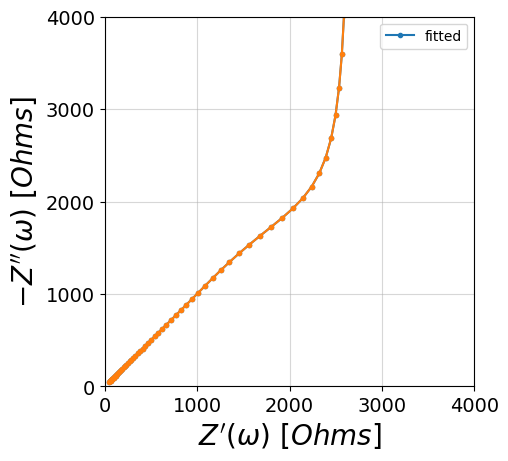

In [5]:
w_prop=np.concatenate((np.real(tlmuni_pred),np.imag(tlmuni_pred)))
fitted_uni_on_uni=tlmuni2.fit(f_pred,tlmuni_pred)
print(fitted_uni_on_uni)

z_fitted=fitted_uni_on_uni.predict(f_pred)
f, ax=plt.subplots()
plot_nyquist(z_fitted,ax=ax,label="fitted")
plot_nyquist(tlmuni_pred,ax=ax)
ax.legend()
ax.set_xlim(0,4000)
ax.set_ylim(0,4000)